In [1]:
import re
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from collections import Counter


## NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')



## Sklearn
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

## Spacy
!pip install spacy && python -m spacy download en
import spacy

## GenSim
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.

# Nieuwe sectie

In [3]:
str_val = "Dit is een testzin om te oefenen op het NLTK pakket.\
Ik heb geen idee wat het resultaat hiervan zal zijn.\
Ik hoop genoeg om geoefend mijn examen af te leggen :-) ."

In [11]:
# Splits tekst in zinnen
zinnen_val = re.split('\.', str_val)
print (zinnen_val)

['Dit is een testzin om te oefenen op het NLTK pakket', 'Ik heb geen idee wat het resultaat hiervan zal zijn', 'Ik hoop genoeg om geoefend mijn examen af te leggen :-) ', '']


In [26]:
from nltk.tokenize import RegexpTokenizer
# Splits tekst in woorden met tokenize
words_val = word_tokenize(str_val)
print (words_val)
# Splits tekst in woorden 2
val3 = re.findall('(\d+|\w+)', str_val)
print(val3)

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(str_val)
print(tokens)

['Dit', 'is', 'een', 'testzin', 'om', 'te', 'oefenen', 'op', 'het', 'NLTK', 'pakket.Ik', 'heb', 'geen', 'idee', 'wat', 'het', 'resultaat', 'hiervan', 'zal', 'zijn.Ik', 'hoop', 'genoeg', 'om', 'geoefend', 'mijn', 'examen', 'af', 'te', 'leggen', ':', '-', ')', '.']
['Dit', 'is', 'een', 'testzin', 'om', 'te', 'oefenen', 'op', 'het', 'NLTK', 'pakket', 'Ik', 'heb', 'geen', 'idee', 'wat', 'het', 'resultaat', 'hiervan', 'zal', 'zijn', 'Ik', 'hoop', 'genoeg', 'om', 'geoefend', 'mijn', 'examen', 'af', 'te', 'leggen']
['Dit', 'is', 'een', 'testzin', 'om', 'te', 'oefenen', 'op', 'het', 'NLTK', 'pakket', 'Ik', 'heb', 'geen', 'idee', 'wat', 'het', 'resultaat', 'hiervan', 'zal', 'zijn', 'Ik', 'hoop', 'genoeg', 'om', 'geoefend', 'mijn', 'examen', 'af', 'te', 'leggen']


In [12]:
# Splits enkel eerste zin in woorden
words_val = re.findall('(\d+|\w+)', zinnen_val[0])
print(words_val)

['Dit', 'is', 'een', 'testzin', 'om', 'te', 'oefenen', 'op', 'het', 'NLTK', 'pakket']


In [20]:
# Alle woorden naar kleine letters zetten om correct te kunnen tellen
nieuwetekst = str_val.lower()
print(nieuwetekst)
tokens = re.findall('(\d+|\w+)', nieuwetekst)
print (tokens)

dit is een testzin om te oefenen op het nltk pakket.ik heb geen idee wat het resultaat hiervan zal zijn.ik hoop genoeg om geoefend mijn examen af te leggen :-) .
['dit', 'is', 'een', 'testzin', 'om', 'te', 'oefenen', 'op', 'het', 'nltk', 'pakket', 'ik', 'heb', 'geen', 'idee', 'wat', 'het', 'resultaat', 'hiervan', 'zal', 'zijn', 'ik', 'hoop', 'genoeg', 'om', 'geoefend', 'mijn', 'examen', 'af', 'te', 'leggen']


In [25]:
# Tel aantal woorden
counter = Counter(tokens)
print(counter)
counter2 = Counter(sorted(tokens))
print(counter2)

counter.most_common(5)

Counter({'om': 2, 'te': 2, 'het': 2, 'ik': 2, 'dit': 1, 'is': 1, 'een': 1, 'testzin': 1, 'oefenen': 1, 'op': 1, 'nltk': 1, 'pakket': 1, 'heb': 1, 'geen': 1, 'idee': 1, 'wat': 1, 'resultaat': 1, 'hiervan': 1, 'zal': 1, 'zijn': 1, 'hoop': 1, 'genoeg': 1, 'geoefend': 1, 'mijn': 1, 'examen': 1, 'af': 1, 'leggen': 1})
Counter({'het': 2, 'ik': 2, 'om': 2, 'te': 2, 'af': 1, 'dit': 1, 'een': 1, 'examen': 1, 'geen': 1, 'genoeg': 1, 'geoefend': 1, 'heb': 1, 'hiervan': 1, 'hoop': 1, 'idee': 1, 'is': 1, 'leggen': 1, 'mijn': 1, 'nltk': 1, 'oefenen': 1, 'op': 1, 'pakket': 1, 'resultaat': 1, 'testzin': 1, 'wat': 1, 'zal': 1, 'zijn': 1})


[('om', 2), ('te', 2), ('het', 2), ('ik', 2), ('dit', 1)]

## Regular Expressions

In [ ]:
str_val = 'Let us try some NLP '\
            'all together during this last session. '\
            'The exercises will not be so difficult '\
            'and the end is near for us which makes it fun!' \
            'The question will we be successful? '\
            'And will there be 1 student who dares to ask questions?' \
            'This student would be very brave.'

In [ ]:
val1 = re.split('\.', str_val)
print(val1)

['Let us try some NLP all together during this last session', ' The exercises will not be so difficult and the end is near for us which makes it fun!The question will we be successful? And will there be 1 student who dares to ask questions?This student would be very brave', '']


In [ ]:
val2 = re.findall('[A-Z]', str_val)
print(val2)
val3 = re.findall('(\d+|\w+)', str_val)
print(val3)

['L', 'N', 'L', 'P', 'T', 'T', 'A', 'T']
['Let', 'us', 'try', 'some', 'NLP', 'all', 'together', 'during', 'this', 'last', 'session', 'The', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', 'The', 'question', 'will', 'we', 'be', 'successful', 'And', 'will', 'there', 'be', '1', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'This', 'student', 'would', 'be', 'very', 'brave']


In [ ]:
val4 = re.search('\d', str_val)
print(val4)
print(val4.start(), val4.end())

<_sre.SRE_Match object; span=(198, 199), match='1'>
198 199


In [ ]:
val5 = re.match('[A-Z]', str_val)
print(val5)

<_sre.SRE_Match object; span=(0, 1), match='L'>


## Tokenization

NLTK Tokenization
https://www.nltk.org/api/nltk.tokenize.html

In [ ]:
sent_tokenize(str_val)

['Let us try some NLP all together during this last session.',
 'The exercises will not be so difficult and the end is near for us which makes it fun!The question will we be successful?',
 'And will there be 1 student who dares to ask questions?This student would be very brave.']

In [ ]:
regexp_tokenize(str_val, '[a-z]*')

['',
 'et',
 '',
 'us',
 '',
 'try',
 '',
 'some',
 '',
 '',
 '',
 '',
 '',
 'all',
 '',
 'together',
 '',
 'during',
 '',
 'this',
 '',
 'last',
 '',
 'session',
 '',
 '',
 '',
 'he',
 '',
 'exercises',
 '',
 'will',
 '',
 'not',
 '',
 'be',
 '',
 'so',
 '',
 'difficult',
 '',
 'and',
 '',
 'the',
 '',
 'end',
 '',
 'is',
 '',
 'near',
 '',
 'for',
 '',
 'us',
 '',
 'which',
 '',
 'makes',
 '',
 'it',
 '',
 'fun',
 '',
 '',
 'he',
 '',
 'question',
 '',
 'will',
 '',
 'we',
 '',
 'be',
 '',
 'successful',
 '',
 '',
 '',
 'nd',
 '',
 'will',
 '',
 'there',
 '',
 'be',
 '',
 '',
 '',
 'student',
 '',
 'who',
 '',
 'dares',
 '',
 'to',
 '',
 'ask',
 '',
 'questions',
 '',
 '',
 'his',
 '',
 'student',
 '',
 'would',
 '',
 'be',
 '',
 'very',
 '',
 'brave',
 '',
 '']

In [ ]:
word_tokenize(str_val)

['Let',
 'us',
 'try',
 'some',
 'NLP',
 'all',
 'together',
 'during',
 'this',
 'last',
 'session',
 '.',
 'The',
 'exercises',
 'will',
 'not',
 'be',
 'so',
 'difficult',
 'and',
 'the',
 'end',
 'is',
 'near',
 'for',
 'us',
 'which',
 'makes',
 'it',
 'fun',
 '!',
 'The',
 'question',
 'will',
 'we',
 'be',
 'successful',
 '?',
 'And',
 'will',
 'there',
 'be',
 '1',
 'student',
 'who',
 'dares',
 'to',
 'ask',
 'questions',
 '?',
 'This',
 'student',
 'would',
 'be',
 'very',
 'brave',
 '.']

In [ ]:
tknzr = TweetTokenizer()
tweet = "@cmiddag: This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

tknzr.tokenize(tweet)

['@cmiddag',
 ':',
 'This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [ ]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tknzr.tokenize(tweet)

[':',
 'This',
 'is',
 'a',
 'coool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [ ]:
regexp_tokenize(tweet, "([@#]\w+)")

['@cmiddag', '#dummysmiley']

## Charting

['Let', 'us', 'try', 'some', 'NLP', 'all', 'together', 'during', 'this', 'last', 'session', '.', 'The', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', '!', 'The', 'question', 'will', 'we', 'be', 'successful', '?', 'And', 'will', 'there', 'be', '1', 'student', 'who', 'dares', 'to', 'ask', 'questions', '?', 'This', 'student', 'would', 'be', 'very', 'brave', '.']
[3, 2, 3, 4, 3, 3, 8, 6, 4, 4, 7, 1, 3, 9, 4, 3, 2, 2, 9, 3, 3, 3, 2, 4, 3, 2, 5, 5, 2, 3, 1, 3, 8, 4, 2, 2, 10, 1, 3, 4, 5, 2, 1, 7, 3, 5, 2, 3, 9, 1, 4, 7, 5, 2, 4, 5, 1]


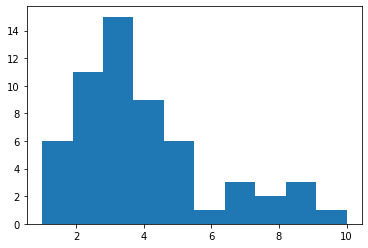

In [ ]:
words = word_tokenize(str_val)

print(words)

word_lengths = [len(w) for w in words]

print(word_lengths)

plt.hist(word_lengths)

plt.show()

In [ ]:
## Bag-of-words

In [ ]:
str_val2 = """The cat is in the box. The cat likes the box. The box is over the cat."""

counter = Counter(word_tokenize(str_val2))
print(counter)

counter.most_common(5)

Counter({'The': 3, 'cat': 3, 'the': 3, 'box': 3, '.': 3, 'is': 2, 'in': 1, 'likes': 1, 'over': 1})


[('The', 3), ('cat', 3), ('the', 3), ('box', 3), ('.', 3)]

## Preprocessing

In [ ]:
tokens = [w for w in word_tokenize(str_val.lower())
         if w.isalpha()]

print(tokens)
print(stopwords.words('english'))
no_stops = [t for t in tokens
           if t not in stopwords.words('english')]

print(no_stops)

Counter(no_stops).most_common(2)

['let', 'us', 'try', 'some', 'nlp', 'all', 'together', 'during', 'this', 'last', 'session', 'the', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', 'the', 'question', 'will', 'we', 'be', 'successful', 'and', 'will', 'there', 'be', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'this', 'student', 'would', 'be', 'very', 'brave']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of

[('us', 2), ('student', 2)]

In [ ]:


tokens = [w for w in word_tokenize(str_val.lower()) if w.isalpha()]
print(tokens)

['let', 'us', 'try', 'some', 'nlp', 'all', 'together', 'during', 'this', 'last', 'session', 'the', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'end', 'is', 'near', 'for', 'us', 'which', 'makes', 'it', 'fun', 'the', 'question', 'will', 'we', 'be', 'successful', 'and', 'will', 'there', 'be', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'this', 'student', 'would', 'be', 'very', 'brave']


In [ ]:
no_stops = [t for t in tokens if t not in stopwords.words('english')]
print(no_stops)

['let', 'us', 'try', 'nlp', 'together', 'last', 'session', 'exercises', 'difficult', 'end', 'near', 'us', 'makes', 'fun', 'question', 'successful', 'student', 'dares', 'ask', 'questions', 'student', 'would', 'brave']


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

print(lemmatized)

['let', 'u', 'try', 'nlp', 'together', 'last', 'session', 'exercise', 'difficult', 'end', 'near', 'u', 'make', 'fun', 'question', 'successful', 'student', 'dare', 'ask', 'question', 'student', 'would', 'brave']


In [ ]:
Counter(lemmatized)
Counter(lemmatized).most_common(5)

[('u', 2), ('question', 2), ('student', 2), ('let', 1), ('try', 1)]

## GenSim

In [ ]:
my_documents = ['The movie was about a spaceship and aliens.',
    'I really liked the movie!',
    'Awesome action scenes, but boring characters.',
    'The movie was awful! I hate alien films.',
    'Space is cool! I liked the movie.',
    'More space films, please!']

tokenized_docs = [word_tokenize(doc.lower())
                 for doc in my_documents]

dictionary = Dictionary(tokenized_docs)

In [ ]:
dictionary.token2id

{'!': 9,
 ',': 13,
 '.': 0,
 'a': 1,
 'about': 2,
 'action': 14,
 'alien': 20,
 'aliens': 3,
 'and': 4,
 'awesome': 15,
 'awful': 21,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'cool': 24,
 'films': 22,
 'hate': 23,
 'i': 10,
 'is': 25,
 'liked': 11,
 'more': 27,
 'movie': 5,
 'please': 28,
 'really': 12,
 'scenes': 19,
 'space': 26,
 'spaceship': 6,
 'the': 7,
 'was': 8}

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

## TF-IDF

In [ ]:
tfidf = TfidfModel(corpus)

In [ ]:
tfidf[corpus[3]]

[(0, 0.11167183378630395),
 (5, 0.11167183378630395),
 (7, 0.11167183378630395),
 (8, 0.30257609456991347),
 (9, 0.11167183378630395),
 (10, 0.19090426078360948),
 (20, 0.4934803553535229),
 (21, 0.4934803553535229),
 (22, 0.30257609456991347),
 (23, 0.4934803553535229)]

## Named Entity Recognition

In [ ]:
sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)

In [ ]:
tagged_sent = nltk.pos_tag(tokenized_sent)
print(tagged_sent)

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP'), (',', ','), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('ride', 'VB'), ('the', 'DT'), ('Metro', 'NNP'), ('to', 'TO'), ('visit', 'VB'), ('MOMA', 'NNP'), ('and', 'CC'), ('some', 'DT'), ('restaurants', 'NNS'), ('rated', 'VBN'), ('well', 'RB'), ('by', 'IN'), ('Ruth', 'NNP'), ('Reichl', 'NNP'), ('.', '.')]


 - CC coordinating conjunction
 - CD cardinal digit
 - DT determiner
 - EX existential there (like: "there is" ... think of it like "there exists")
 - FW foreign word
 - IN preposition/subordinating conjunction
 - JJ adjective 'big'
 - JJR adjective, comparative 'bigger'
 - JJS adjective, superlative 'biggest'
 - LS list marker 1)
 - MD modal could, will
 - NN noun, singular 'desk'
 - NNS noun plural 'desks'
 - NNP proper noun, singular 'Harrison'
 - NNPS proper noun, plural 'Americans'
 - PDT predeterminer 'all the kids'
 - POS possessive ending parent's
 - PRP personal pronoun I, he, she
 - PRP\$ possessive pronoun my, his, hers
 - RB adverb very, silently,
 - RBR adverb, comparative better
 - RBS adverb, superlative best
 - RP particle give up
 - TO to go 'to' the store.
 - UH interjection errrrrrrrm
 - VB verb, base form take
 - VBD verb, past tense took
 - VBG verb, gerund/present participle taking
 - VBN verb, past participle taken
 - VBP verb, sing. present, non-3d take
 - VBZ verb, 3rd person sing. present takes
 - WDT wh-determiner which
 - WP wh-pronoun who, what
 - WP\$ possessive wh-pronoun whose
 - WRB wh-abverb where, when

In [ ]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


## Spacy

In [ ]:
nlp = spacy.load('en')

nlp.entity

doc = nlp("""Berlin is the capital of Germany; 
                  and the residence of Chancellor Angela Merkel.""")
print(doc)

print(doc.ents[0], doc.ents[0].label_)

Berlin is the capital of Germany; 
                  and the residence of Chancellor Angela Merkel.
Berlin GPE


## IMDB

In [27]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [28]:
meta = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)
# rename columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

meta.head()

plots = []

with open("plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)
            

movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

FileNotFoundError: ignored

In [ ]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

movies.head()

In [ ]:
# change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

In [ ]:
movies['genre'][0]

type(json.loads(movies['genre'][0]))

json.loads(movies['genre'][0]).values()

In [ ]:
# an empty list
genres = [] 

# extract genres
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = genres

print(genres)

In [ ]:
# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [ ]:
movies_new

In [ ]:
# get all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

In [ ]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [ ]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [ ]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))
print(movies_new['clean_plot'])

In [ ]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

In [ ]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

In [ ]:
freq_words(movies_new['clean_plot'], 100)

In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])
print(y)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [ ]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=1)

In [ ]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

print(xtrain_tfidf)
print(ytrain)



In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [ ]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

In [ ]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

print(y_pred)

In [ ]:
multilabel_binarizer.inverse_transform(y_pred)[3]

In [ ]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

In [ ]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

In [ ]:

def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [ ]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")